In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
import seaborn as sns
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = "/content/amazon_alexa.tsv"

In [5]:
df = pd.read_csv(file_path, delimiter = '\t', quoting = 3)

In [6]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [19]:
df.sample(10)

,rating,date,variation,verified_reviews,feedback
360,4,29-Jul-18,White,"""So i am not sure how i feel about the echo do...",1
1895,2,27-Jul-18,Black Plus,"""I’m still unable to connect any devices altho...",0
2045,2,14-Jul-18,White Plus,"""The sound quality is not that good, especiall...",0
2415,5,30-Jul-18,Configuration: Fire TV Stick,"""This was purchased for our toy hauler, but it...",1
2230,5,30-Jul-18,Configuration: Fire TV Stick,Works great,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
700,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1
2350,5,30-Jul-18,Configuration: Fire TV Stick,availability of movies and nothing I don't like,1
1042,5,28-Jul-18,Charcoal Fabric,Great sound for the size and the prize!! And o...,1
1578,5,29-Jul-18,White Show,Love being able to read the lyrics of my favor...,1


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f" rows in Amazon Alexa data are {df.shape[0]} and columns are {df.shape[1]}")

 rows in Amazon Alexa data are 3150 and columns are 5


### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


#### Missing Values/Null Values

In [7]:
#### Missing Values/Null Values
print(df.isnull().sum())

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64


In [8]:
#Getting the record where 'verified_reviews' is null

df[df['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [7]:
#We will drop the null record

df.dropna(inplace=True)

In [ ]:
df.shape

(3149, 5)

### We will consider 1000 random records for our analysis

In [53]:
new_df = df.sample(1000,random_state=2)

In [54]:
new_df.shape

(1000, 5)

### Creating some new features

In [ ]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

new_df['review_length'] = new_df['verified_reviews'].str.len()
new_df['review_words']  = new_df['verified_reviews'].apply(lambda row: len(row.split(" ")) )


In [ ]:
new_df.head(5)

,rating,date,variation,verified_reviews,feedback,review_length,review_words
1456,4,30-Jul-18,Black Show,very nice-needs some work,1,25,4
789,5,30-Jul-18,Charcoal Fabric,"""Love it! I was thinking about getting one and...",1,592,110
355,4,30-Jul-18,Black,Works just fine.,1,16,3
338,3,28-Jul-18,Charcoal Fabric,Beyond my capabilities to program. Grandkids l...,1,51,8
3141,3,30-Jul-18,Black Dot,,1,1,2


## Analyzing 'rating' column

In [ ]:
#Distinct values of 'rating' and its count

print(f"Rating value count: \n{new_df['rating'].value_counts()}")

Rating value count: 
rating
5    731
4    141
3     51
1     50
2     27
Name: count, dtype: int64


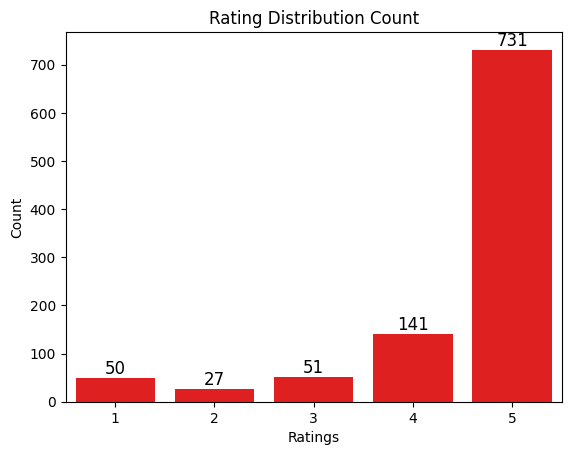

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create bar plot
plots = sns.barplot(x=new_df['rating'].value_counts().index,
                    y=new_df['rating'].value_counts().values,
                    color='red')

# Add labels on bars
for bar in plots.patches:
    plots.text(bar.get_x() + bar.get_width() / 2,   # X-coordinate (center of bar)
               bar.get_height(),                    # Y-coordinate (height of bar)
               int(bar.get_height()),               # Text (convert to integer if needed)
               ha='center', va='bottom', fontsize=12)  # Alignment

# Customize plot
plt.title('Rating Distribution Count')
plt.xlabel('Ratings')
plt.ylabel('Count')

# Show plot
plt.show()


In [ ]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(new_df['rating'].value_counts()/new_df.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    73.1
4    14.1
3     5.1
1     5.0
2     2.7
Name: count, dtype: float64


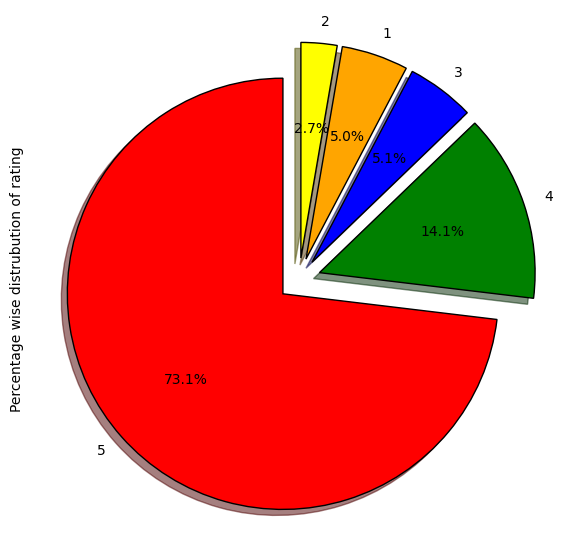

In [ ]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = new_df['rating'].value_counts()/new_df.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

## Analyzing 'feedback' column

In [ ]:
#Distinct values of 'feedback' and its count

print(f"Feedback value count: \n{new_df['feedback'].value_counts()}")

Feedback value count: 
feedback
1    923
0     77
Name: count, dtype: int64


In [ ]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = new_df[new_df['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

"This product currently has two related software flaws that make it completely unusable:1) There is a &#34;card&#34; on the homescreen called &#34;Things To Try&#34; -- it's an ad for other Alexa services you can try. You can turn off all the other homescreen cards, but not this one.2) By default, the homescreen cards &#34;cycle&#34; automatically, which is incredibly annoying. There is a setting where you can opt to have the cards only &#34;cycle once&#34; instead of &#34;cycle continuously&#34;, but critically *this setting does not work*. My unit has been set to &#34;cycle once&#34;, and the cards still continue to cycle all the time. Have rebooted the device, re-set, etc etc.Until these two obvious software issues are fixed, in my opinion the product is useless."


In [ ]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = new_df[new_df['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

"Love it! I was thinking about getting one and when the prime day discount was offered, I could not pass it up! It's fun to ask Alexa to play any song or group and she comes up with a playlist from Amazon Prime Music. You can also connect your iPhone with bluetooth and play music with Pandora or YouTube videos using Alexa as a speaker. I've been having fun asking Alexa different types of questions or for information like weather, news or even the time in other countries. The only downside is if you have limited data on your wifi plan, because Alexa uses burns it up when playing music."


#### From the above 2 examples we can see that feedback 0 is negative review and 1 is positive review

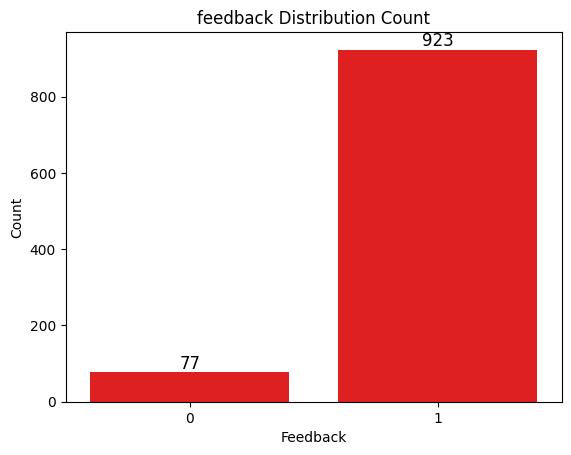

In [ ]:
# Create bar plot
plots = sns.barplot(x=new_df['feedback'].value_counts().index,
                    y=new_df['feedback'].value_counts().values,
                    color='red')

# Add labels on bars
for bar in plots.patches:
    plots.text(bar.get_x() + bar.get_width() / 2,   # X-coordinate (center of bar)
               bar.get_height(),                    # Y-coordinate (height of bar)
               int(bar.get_height()),               # Text (convert to integer if needed)
               ha='center', va='bottom', fontsize=12)  # Alignment

# Customize plot
plt.title('feedback Distribution Count')
plt.xlabel('Feedback')
plt.ylabel('Count')

# Show plot
plt.show()

In [ ]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(new_df['feedback'].value_counts()/new_df.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    92.3
0     7.7
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distrubution of feedback'>

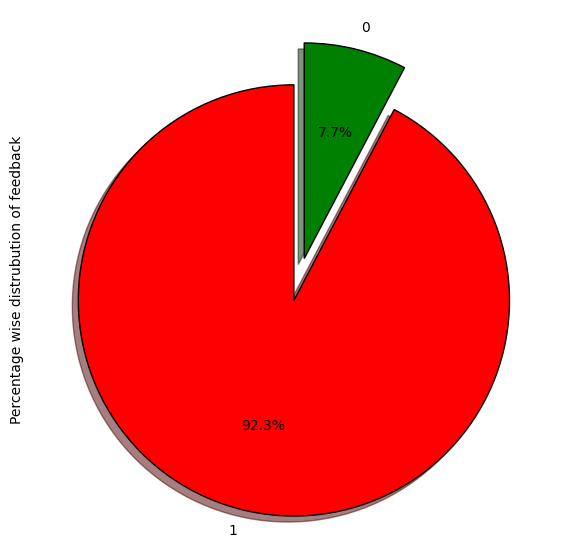

In [ ]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = new_df['feedback'].value_counts()/new_df.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

### Let's see the 'rating' values for different values of 'feedback'

In [ ]:
#Feedback = 0
new_df[new_df['feedback'] == 0]['rating'].value_counts()

,count
rating,
1,50
2,27


In [ ]:
#Feedback = 1
new_df[new_df['feedback'] == 1]['rating'].value_counts()

,count
rating,
5,731
4,141
3,51


If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).

## Analyzing 'variation' column

In [ ]:
#Distinct values of 'variation' and its count

print(f"Variation value count: \n{new_df['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      172
Charcoal Fabric                 138
Configuration: Fire TV Stick    104
Black  Plus                      92
Black  Show                      89
Black  Spot                      77
Black                            70
White  Dot                       62
Heather Gray Fabric              48
White  Spot                      36
White  Show                      31
White                            29
White  Plus                      26
Sandstone Fabric                 21
Walnut Finish                     3
Oak Finish                        2
Name: count, dtype: int64


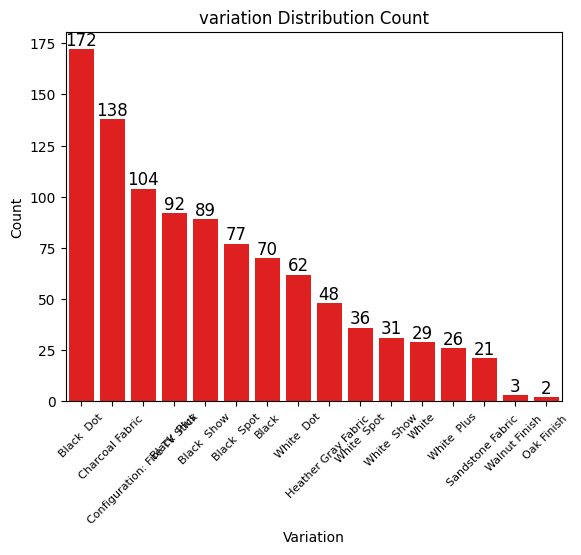

In [ ]:
# Create bar plot
plots = sns.barplot(x=new_df['variation'].value_counts().index,
                    y=new_df['variation'].value_counts().values,
                    color='red')

# Add labels on bars
for bar in plots.patches:
    plots.text(bar.get_x() + bar.get_width() / 2,   # X-coordinate (center of bar)
               bar.get_height(),                    # Y-coordinate (height of bar)
               int(bar.get_height()),               # Text (convert to integer if needed)
               ha='center', va='bottom', fontsize=12)  # Alignment

# Customize x-axis labels
plt.xticks(rotation=45, fontsize=8)  # Rotate x-axis labels by 45 degrees and reduce font size

# Customize plot
plt.title('variation Distribution Count')
plt.xlabel('Variation')
plt.ylabel('Count')

# Show plot
plt.show()


In [ ]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(new_df['variation'].value_counts()/new_df.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      17.2
Charcoal Fabric                 13.8
Configuration: Fire TV Stick    10.4
Black  Plus                      9.2
Black  Show                      8.9
Black  Spot                      7.7
Black                            7.0
White  Dot                       6.2
Heather Gray Fabric              4.8
White  Spot                      3.6
White  Show                      3.1
White                            2.9
White  Plus                      2.6
Sandstone Fabric                 2.1
Walnut Finish                    0.3
Oak Finish                       0.2
Name: count, dtype: float64


In [ ]:
new_df['variation'].nunique()

16

<Axes: ylabel='Percentage wise distrubution of variation'>

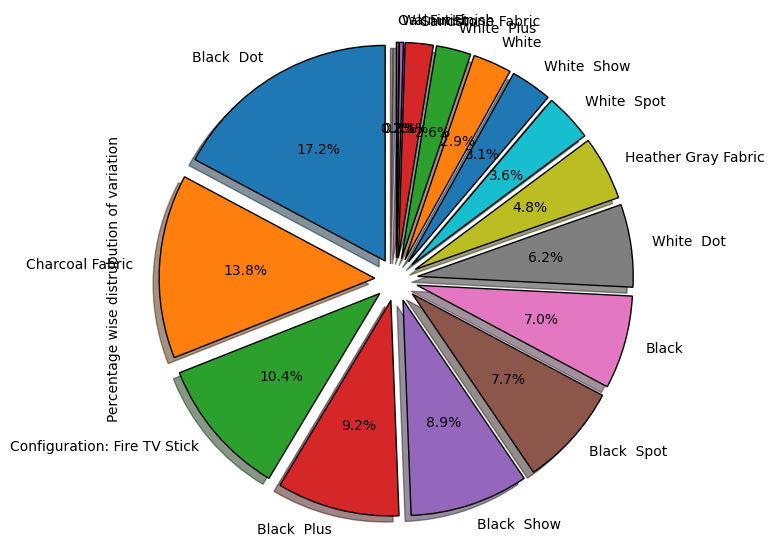

In [ ]:
fig = plt.figure(figsize=(7,7))

#colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = new_df['variation'].value_counts()/new_df.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%0.1f%%", shadow=True,  startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of variation')

## Analyzing 'verified_reviews' column

In [ ]:
new_df.head(3)

,rating,date,variation,verified_reviews,feedback,review_length,review_words
1456,4,30-Jul-18,Black Show,very nice-needs some work,1,25,4
789,5,30-Jul-18,Charcoal Fabric,"""Love it! I was thinking about getting one and...",1,592,110
355,4,30-Jul-18,Black,Works just fine.,1,16,3


[Text(0.5, 1.0, 'Distribution of review_length')]

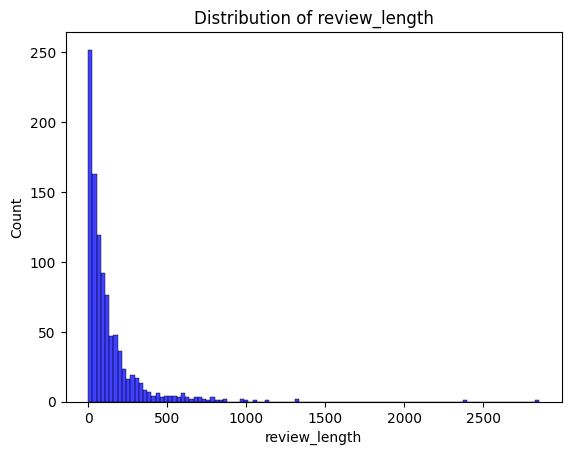

In [ ]:
sns.histplot(new_df['review_length'],color='blue').set(title='Distribution of review_length')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

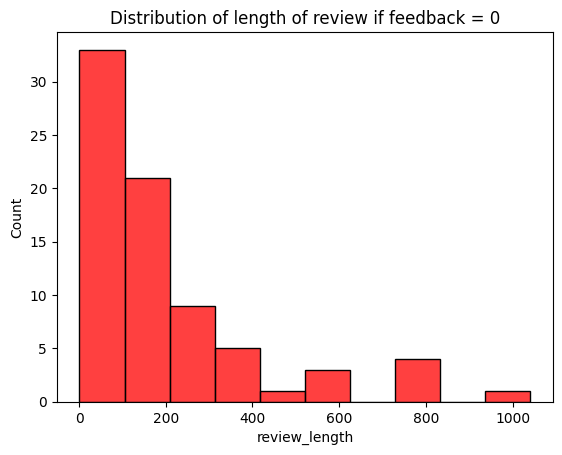

In [ ]:
# Length analysis when feedback is 0 (negative)
sns.histplot(new_df[new_df['feedback']==0]['review_length'],color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

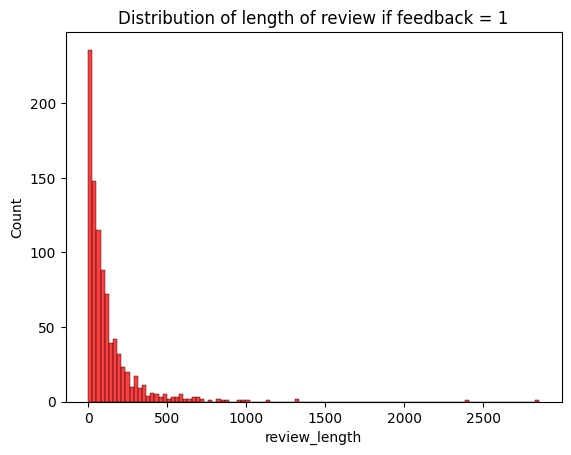

In [ ]:
# Length analysis when feedback is 1 (positive)
sns.histplot(new_df[new_df['feedback']==1]['review_length'],color='red').set(title='Distribution of length of review if feedback = 1')

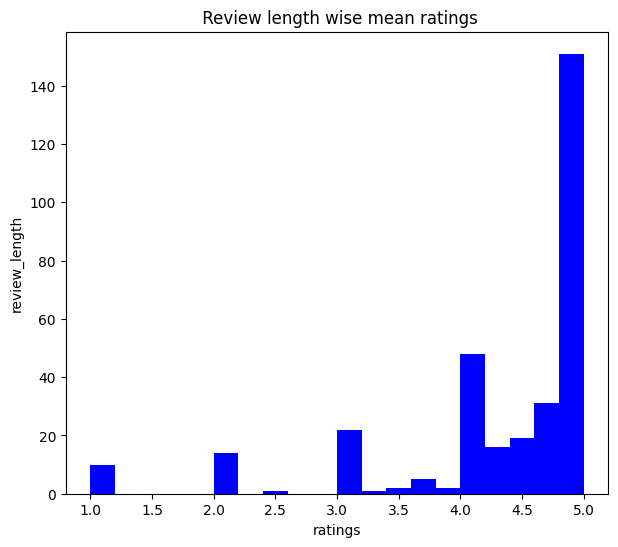

In [ ]:
# Length wise mean rating
new_df.groupby('review_length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('review_length')
plt.show()

#### Review words

[Text(0.5, 1.0, 'Distribution of review_words')]

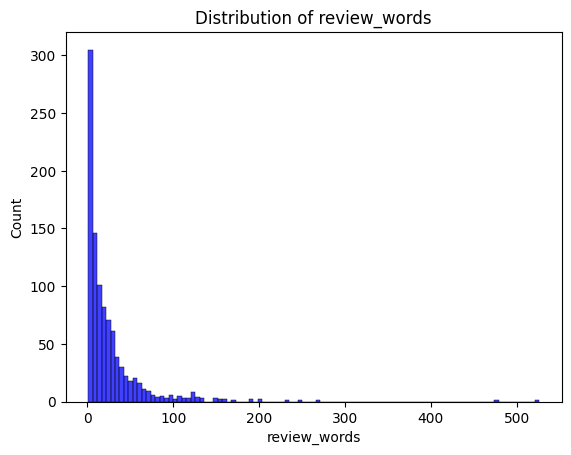

In [ ]:
sns.histplot(new_df['review_words'],color='blue').set(title='Distribution of review_words')

[Text(0.5, 1.0, 'Distribution of length of review words if feedback = 0')]

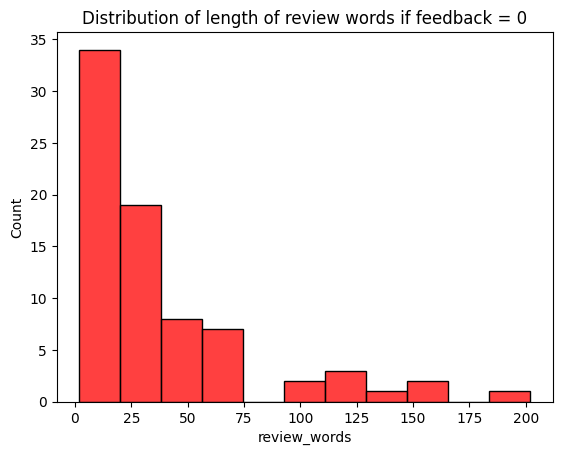

In [ ]:
# word analysis when feedback is 0 (negative)
sns.histplot(new_df[new_df['feedback']==0]['review_words'],color='red').set(title='Distribution of length of review words if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review words if feedback = 1')]

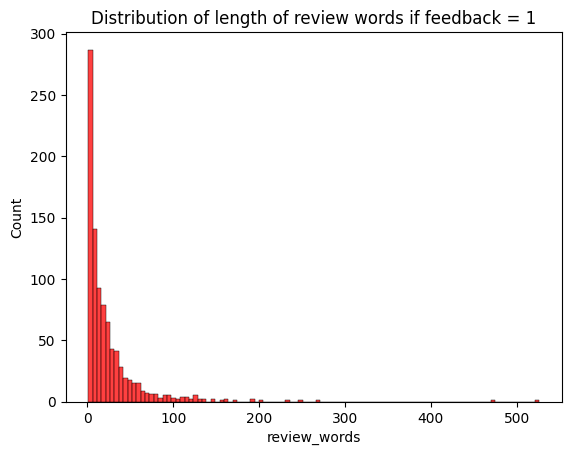

In [ ]:
# word analysis when feedback is 1 (positive)
sns.histplot(new_df[new_df['feedback']==1]['review_words'],color='red').set(title='Distribution of length of review words if feedback = 1')

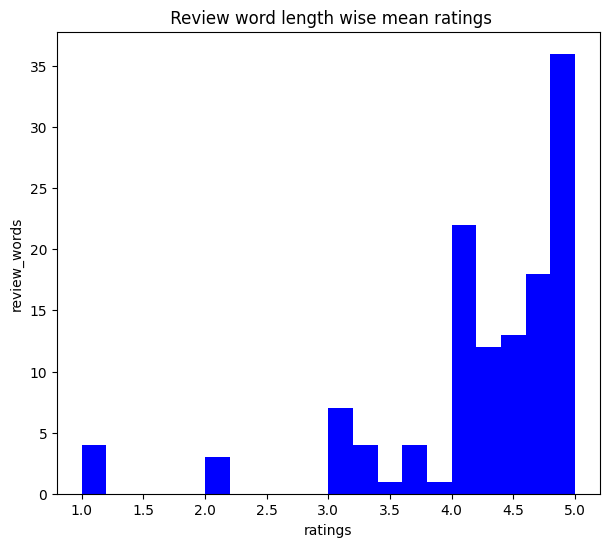

In [ ]:
# Length wise mean rating
new_df.groupby('review_words')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review word length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('review_words')
plt.show()

In [ ]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(new_df.verified_reviews)

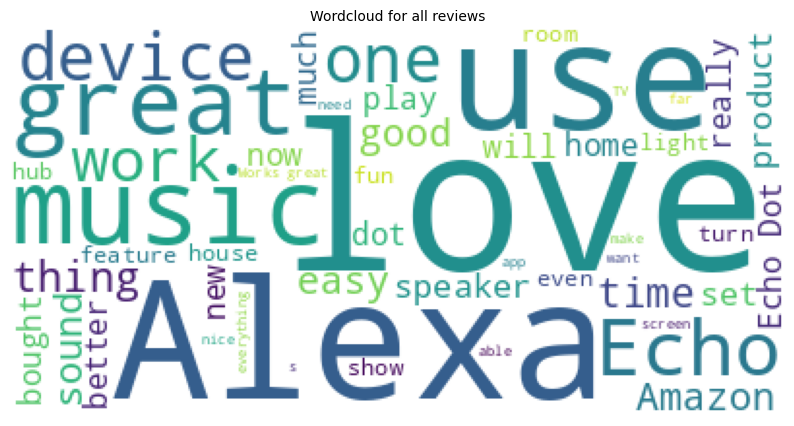

In [ ]:
# Combine all reviews
reviews = " ".join([review for review in new_df['verified_reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in new_df[new_df['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in new_df[new_df['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

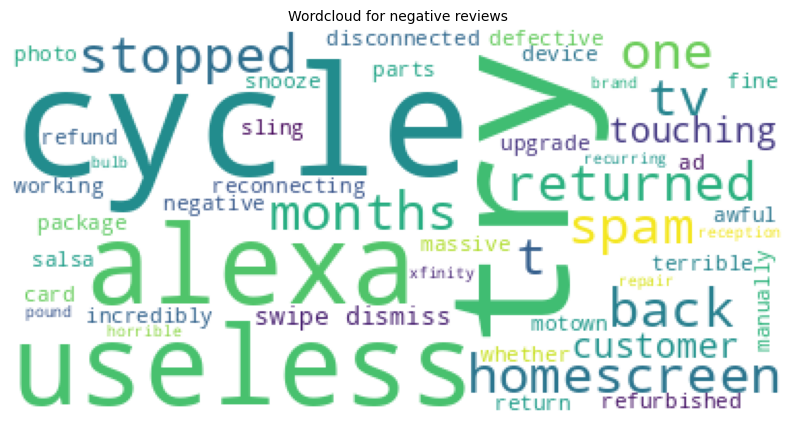

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

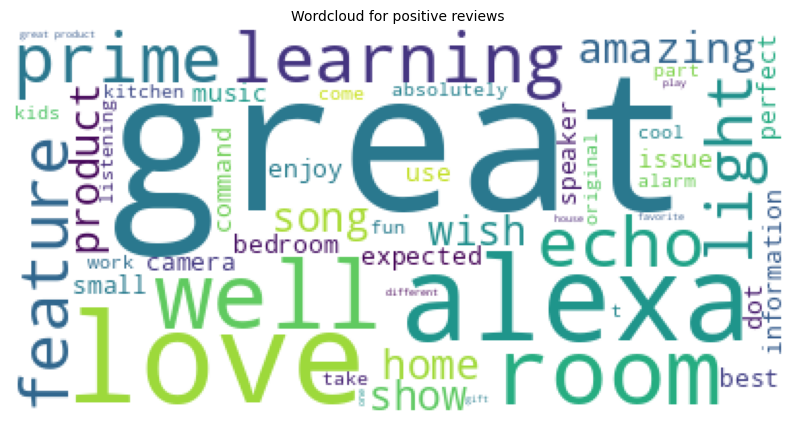

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

## Preprocessing

In [8]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')


    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

In [ ]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [ ]:
new_df.head()

,rating,date,variation,verified_reviews,feedback,review_length,review_words
1456,4,30-Jul-18,Black Show,very nice-needs some work,1,25,4
789,5,30-Jul-18,Charcoal Fabric,"""Love it! I was thinking about getting one and...",1,592,110
355,4,30-Jul-18,Black,Works just fine.,1,16,3
338,3,28-Jul-18,Charcoal Fabric,Beyond my capabilities to program. Grandkids l...,1,51,8
3141,3,30-Jul-18,Black Dot,,1,1,2


In [9]:
df['verified_reviews'] = df['verified_reviews'].apply(preprocess)

In [10]:
df['verified_reviews'][3]

'i have had a lot of fun with this thing  my 4 yr old learns about dinosaurs  i control the lights and play games like categories  has nice sound when playing music as well'

In [12]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [13]:
len(corpus)

3149

In [14]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values

### Dataset Balancing - SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify new class distribution
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_resampled))


Class distribution after SMOTE: Counter({1: 2314, 0: 2314})


In [16]:
X.shape

(3149, 2500)

In [17]:
X_train_resampled.shape

(4628, 2500)

In [18]:
y_train_resampled.shape

(4628,)

In [ ]:
#Saving the Count Vectorizer
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

In [19]:
print(df['feedback'].value_counts())

feedback
1    2893
0     256
Name: count, dtype: int64


In [20]:
print(f"X shape: {X_train_resampled.shape}")
print(f"y shape: {y_train_resampled.shape}")

X shape: (4628, 2500)
y shape: (4628,)


In [21]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (3239, 2500)
y train: (3239,)
X test: (1389, 2500)
y test: (1389,)


In [ ]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 10
X test max value: 12


In [23]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
#Saving the scaler model
pickle.dump(scaler, open('scaler.pkl', 'wb'))

RF

In [ ]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [ ]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9845631367706082
Testing Accuracy : 0.937365010799136


In [ ]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[680  37]
 [ 50 622]]


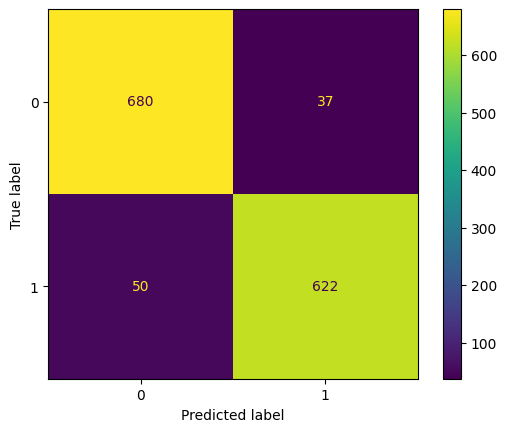

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

K fold cross-validation

In [ ]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9376352100294308
Standard Variance : 0.01614344122715711


In [ ]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [ ]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [ ]:
#Getting the best parameters from the grid search

print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 300}


In [ ]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 96.92810681795652
Cross validation mean accuracy on test set : 91.90692223518558
Accuracy score for test set : 0.937365010799136


In [ ]:
#Saving the XGBoost classifier
pickle.dump(model_rf, open('Model/model_rf.pkl', 'wb'))

XgBoost

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],


}

# Define stratified K-fold cross-validation
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Initialize the model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid,
                           scoring='accuracy', cv=cv, n_jobs=-1, verbose=2)

grid_search.fit(X_train_scl, y_train)

# Best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.9117024523493414


In [ ]:
# Use the best parameters from GridSearchCV
best_params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

# Train the model using the best parameters
model_xgb = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
model_xgb.fit(X_train_scl, y_train)

# Predictions on training and test set
y_train_pred = model_xgb.predict(X_train_scl)
y_test_pred = model_xgb.predict(X_test_scl)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9493670886075949
Test Accuracy: 0.925845932325414


In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.945662241432541
Testing Accuracy : 0.9215262778977682


In [ ]:
y_preds = model_xgb.predict(X_test)

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[692  25]
 [ 96 576]]


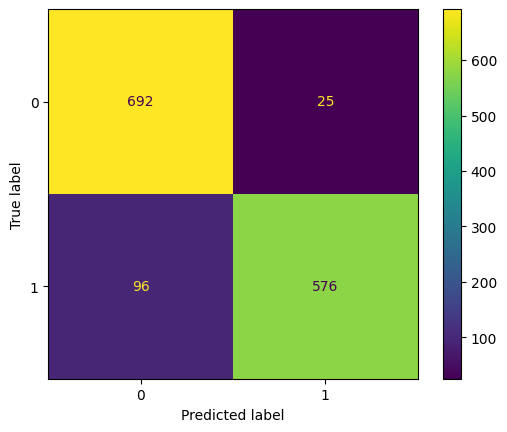

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [ ]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('Model/model_xgb.pkl', 'wb'))

Decision Tree Classifier

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [ ]:
#Accuracy of the model on training and testing data

print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9845631367706082
Testing Accuracy : 0.9272858171346292


In [ ]:
y_preds = model_dt.predict(X_test)

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[680  37]
 [ 63 609]]


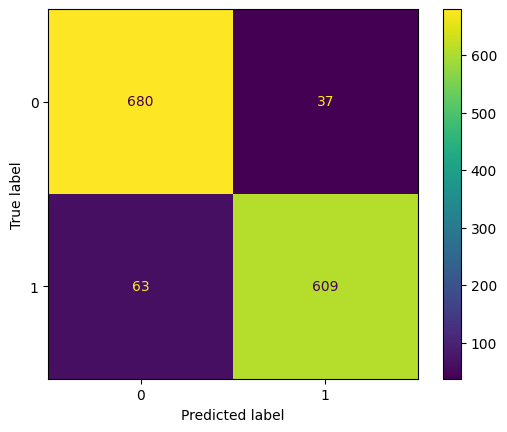

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

In [ ]:
#Saving the Decision Tree classifier
pickle.dump(model_dt, open('Model/model_dt.pkl', 'wb'))

## Predictions

XGBoost


In [24]:
predictor = pickle.load(open(r"Model/model_xgb.pkl", "rb"))
scaler = pickle.load(open(r"scaler.pkl", "rb"))
cv = pickle.load(open(r"countVectorizer.pkl", "rb"))

FileNotFoundError: [Errno 2] No such file or directory: 'Model/model_xgb.pkl'

In [ ]:
X_prediction = cv.transform(corpus).toarray()
X_prediction_scl = scaler.transform(X_prediction)
y_predictions = predictor.predict_proba(X_prediction_scl)
y_predictions = y_predictions.argmax(axis=1)

In [ ]:
y_predictions[111]

0

In [ ]:
df["verified_reviews"][141]

'not much features'

In [ ]:
df[df['feedback'] == 0]

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,it s like siri in fact siri answers more acc...,0
111,2,30-Jul-18,Charcoal Fabric,sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,not much features,0
162,1,30-Jul-18,Sandstone Fabric,stopped working after 2 weeks did not follow ...,0
176,2,30-Jul-18,Heather Gray Fabric,sad joke worthless,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,echo dot responds to us when we are not even t...,0
3048,1,30-Jul-18,White Dot,not connected to my phone playlist,0
3067,2,30-Jul-18,Black Dot,the only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,i didn t order it,0


### RF

In [ ]:
predictor = pickle.load(open(r"Model/model_rf.pkl", "rb"))
scaler = pickle.load(open(r"scaler.pkl", "rb"))
cv = pickle.load(open(r"countVectorizer.pkl", "rb"))

In [ ]:
X_prediction = cv.transform(corpus).toarray()
X_prediction_scl = scaler.transform(X_prediction)
y_predictions = predictor.predict_proba(X_prediction_scl)
y_predictions = y_predictions.argmax(axis=1)

In [ ]:
y_predictions[141]

0

### DT

In [ ]:
predictor = pickle.load(open(r"Model/model_dt.pkl", "rb"))
scaler = pickle.load(open(r"scaler.pkl", "rb"))
cv = pickle.load(open(r"countVectorizer.pkl", "rb"))

X_prediction = cv.transform(corpus).toarray()
X_prediction_scl = scaler.transform(X_prediction)
y_predictions = predictor.predict_proba(X_prediction_scl)
y_predictions = y_predictions.argmax(axis=1)

In [ ]:
y_predictions[162]

0

In [24]:
new_df.head()

,rating,date,variation,verified_reviews,feedback
1456,4,30-Jul-18,Black Show,very nice needs some work,1
789,5,30-Jul-18,Charcoal Fabric,love it i was thinking about getting one and ...,1
355,4,30-Jul-18,Black,works just fine,1
338,3,28-Jul-18,Charcoal Fabric,beyond my capabilities to program grandkids l...,1
3141,3,30-Jul-18,Black Dot,,1


In [25]:
new_df.shape

(1000, 5)

# Sentiment Analysis with Pretrained LLM Models -Bert

## Install and Import Dependencies

In [25]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2.1.0+cu121.with.pypi.cudnn, 2.1.0+rocm5.5, 2.1.0+rocm5.6, 2.1.1, 2.1.1+cpu, 2.1.1+cpu.cxx11.abi, 2.1.1+cu118, 2.1.1+cu121, 2.1.1+cu121.with.pypi.cudnn, 2.1.1+rocm5.5, 2.1.1+rocm5.6, 2.1.2, 2.1.2+cpu, 2.1.2+cpu.cxx11.abi, 2.1.2+cu118, 2.1.2+cu121, 2.1.2+cu121.with.pypi.cudnn, 2.1.2+rocm5.5, 2.1.2+rocm5.6, 2.2.0, 2.2.0+cpu, 2.2.0+cpu.cxx11.abi, 2.2.0+cu118, 2.2.0+cu121, 2.2.0+rocm5.6, 2.2.0

In [26]:
!pip install transformers requests beautifulsoup4 pandas numpy

In [27]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

## Instantiate Model

In [29]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

## Encode and Calculate Sentiment

In [30]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')

In [31]:
result = model(tokens)

In [32]:
result.logits

tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward0>)

In [33]:
int(torch.argmax(result.logits))+1

4

In [34]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [36]:
df['sentiment'] = df['verified_reviews'].apply(lambda x: sentiment_score(x[:512]))

In [37]:
df.head()

,rating,date,variation,verified_reviews,feedback,sentiment
0,5,31-Jul-18,Charcoal Fabric,love my echo,1,5
1,5,31-Jul-18,Charcoal Fabric,loved it,1,5
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer...,1,4
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my 4 ...,1,4
4,5,31-Jul-18,Charcoal Fabric,music,1,5


In [40]:
# check for records having diff in rating and predicted sentiments
df[ df["rating"] != df["sentiment"] ].shape

(958, 6)

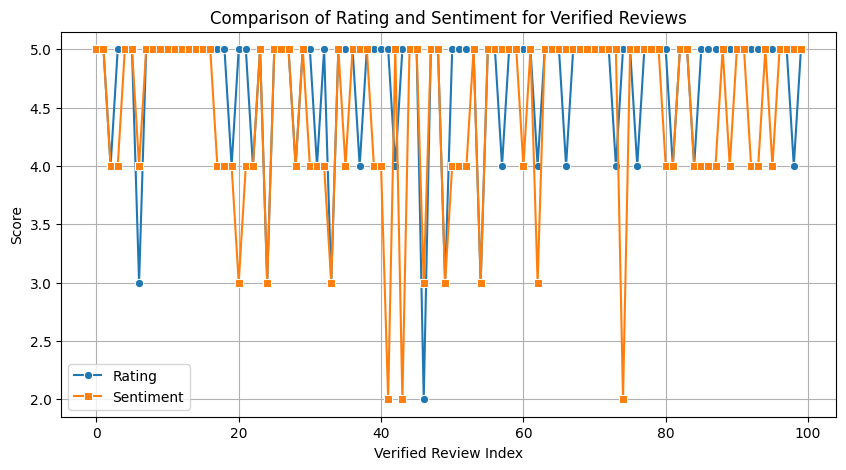

In [42]:
# Plot
temp_df = df.iloc[:100]
plt.figure(figsize=(10, 5))
sns.lineplot(data=temp_df, x=temp_df.index, y="rating", marker="o", label="Rating")
sns.lineplot(data=temp_df, x=temp_df.index, y="sentiment", marker="s", label="Sentiment")

# Labels and title
plt.xlabel("Verified Review Index")
plt.ylabel("Score")
plt.title("Comparison of Rating and Sentiment for Verified Reviews")
plt.legend()
plt.grid(True)

# Show plot
plt.show()





In [43]:
# Function to map sentiment as per Pretrained Bert Model
def assign_final_sentiment(df):
    """
    Assigns 'Positive', 'Neutral', or 'Negative' to the final_sentiment column
    based on sentiment and feedback values.
    """
    def classify_sentiment(row):
        if row["sentiment"] > 3 and row["feedback"] == 1:
            return "Positive"
        elif row["sentiment"] == 3 and row["feedback"] == 1:
            return "Neutral"
        elif row["sentiment"] < 3 and row["feedback"] == 0:
            return "Negative"
        else:
            return "Unknown"  # Default case for handling other scenarios

    # Apply function to create new column
    df["final_sentiment_bert"] = df.apply(classify_sentiment, axis=1)

    return df

In [44]:
assign_final_sentiment(df)

,rating,date,variation,verified_reviews,feedback,sentiment,final_sentiment
0,5,31-Jul-18,Charcoal Fabric,love my echo,1,5,Positive
1,5,31-Jul-18,Charcoal Fabric,loved it,1,5,Positive
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer...,1,4,Positive
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my 4 ...,1,4,Positive
4,5,31-Jul-18,Charcoal Fabric,music,1,5,Positive
...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,perfect for kids adults and everyone in between,1,5,Positive
3146,5,30-Jul-18,Black Dot,listening to music searching locations check...,1,4,Positive
3147,5,30-Jul-18,Black Dot,i do love these things i have them running my...,1,5,Positive
3148,5,30-Jul-18,White Dot,only complaint i have is that the sound qualit...,1,4,Positive


In [45]:
# Save updated file
df.to_csv("updated_pretrained_llm_bert_sentiment.csv", index=False)

print("✅ Allocation complete! Check 'updated_pretrained_bert_sentiment.csv'")

✅ Allocation complete! Check 'updated_pretrained_bert_sentiment.csv'


## Using Transformer Pipeline

In [46]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [47]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [48]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

In [60]:
def predict_review_sentiment(df):
    """
    Applies the transformer sentiment pipeline to each verified review
    and adds two new columns: 'predicted_sentiment' & 'sentiment_score'.
    """
    def get_sentiment(review):
        if isinstance(review, str):  # Ensure review is a valid string
            result = sent_pipeline(review)[0]
            return result["label"], result["score"]
        else:
            return "UNKNOWN", None  # Handle missing or non-string reviews

    # Apply sentiment analysis and store both label & score
    df[["predicted_sentiment_trans", "sentiment_score_trans"]] = df["verified_reviews"].apply(
        lambda review: pd.Series(get_sentiment(review))
    )

    return df



In [63]:
temporary_df = df.sample(1000)

In [64]:
predict_review_sentiment(temporary_df)

,rating,date,variation,verified_reviews,feedback,sentiment,final_sentiment,predicted_sentiment_trans,sentiment_score_trans
1779,5,30-Jul-18,Black Plus,we went to a best buy with the intention of bu...,1,1,Unknown,NEGATIVE,0.998531
585,4,8-Jun-18,Black,2nd one more to come,1,5,Positive,POSITIVE,0.985512
1098,5,30-Jul-18,Black Spot,i had a couple of echo dots previously bough...,1,4,Positive,POSITIVE,0.997959
1100,5,30-Jul-18,Black Spot,love that is can do so much it sits on my nig...,1,4,Positive,POSITIVE,0.998114
2212,4,30-Jul-18,Configuration: Fire TV Stick,love it the only downside is that you can not...,1,4,Positive,NEGATIVE,0.988098
...,...,...,...,...,...,...,...,...,...
2511,5,30-Jul-18,Black Dot,works better than anticipated this thing is a...,1,5,Positive,POSITIVE,0.999797
2580,3,30-Jul-18,Black Dot,speaker could be better qualty,1,3,Neutral,NEGATIVE,0.989153
1277,2,24-Jul-18,Black Spot,alexa is not as smart as siri cannot cancel s...,0,2,Negative,NEGATIVE,0.999275
1353,5,19-Jul-18,Black Spot,the echo spot has really helped me to streamli...,1,5,Positive,POSITIVE,0.997487


In [66]:
temporary_df['verified_reviews'].values[4]

'love it  the only downside is that you can not download any app you want'

In [67]:
# Save updated file
df.to_csv("updated_pretrained_transformer_pipeline_sentiment.csv", index=False)

print("✅ Allocation complete! Check 'updated_pretrained_bert_sentiment.csv'")

✅ Allocation complete! Check 'updated_pretrained_bert_sentiment.csv'
